In [5]:
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pylab as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
master = pd.read_csv('Data/master.csv')

In [7]:
master.head()

,Unnamed: 0,Foreigner,Hill Brahman,Hill Chhetree,Hill Dalit,Madhesi Brahman/Chhetree,Madhesi Dalit,Madhesi Other - OC A,Madhesi Other - OC B,Mtn/Hill Janajati A,...,Tetanus,Tuberculosis,Whooping cough,Alcoholism,Anxiety (Neurosis,Conversive disorder (Hysteria),Depression,Epilesy,Mental retardation,Psychosis
0,Achham,0.000000,0.102036,0.581749,0.135158,0.000101,0.000000,0.004921,0.0,0.006921,...,0.0,62.0,16.0,9.0,311.0,39.0,381.0,108.0,5.0,36.0
1,Arghakhanchi,0.000000,0.327665,0.193248,0.209020,0.001604,0.000066,0.001058,0.0,0.193349,...,0.0,47.0,0.0,56.0,382.0,32.0,267.0,20.0,7.0,66.0
2,Baglung,0.000045,0.195385,0.205601,0.263230,0.001165,0.000000,0.000927,0.0,0.308176,...,4.0,40.0,0.0,102.0,594.0,45.0,302.0,86.0,101.0,130.0
3,Baitadi,0.000052,0.185498,0.603899,0.083153,0.001610,0.000128,0.052499,0.0,0.003870,...,6.0,141.0,1.0,51.0,132.0,15.0,129.0,5.0,44.0,26.0
4,Bajhang,0.000077,0.101953,0.726490,0.113103,0.000497,0.000102,0.000277,0.0,0.002055,...,1.0,90.0,4.0,20.0,246.0,34.0,167.0,26.0,7.0,45.0


In [9]:
master = master.rename(columns={'Unnamed: 0':'District'})

In [10]:
master =  master.drop(['Population', 'Standard Error of Poverty Gap', 'Standard Error of Poverty Incidence', \
                      'Standard Error of Poverty Severity', 'Total Population', 'Zone', 'Geographical Region', \
                       'Development Region', 'Zone.1', 'Geographical Region.1', 'Development Region.1'], axis=1)

In [11]:
k = [i for i in range(16,len(master.columns))]

In [12]:
master.iloc[:,k].head()

,Total Pop Census,Poverty Gap,Poverty Incidence,Poverty Severity,Adult illiteracy rate,Deprivation in economic provisioning,HPI,Percentage of People not expected to survive age 40,Percentage of children under age five who are malnurished,Percentage without safe water,...,Tetanus,Tuberculosis,Whooping cough,Alcoholism,Anxiety (Neurosis,Conversive disorder (Hysteria),Depression,Epilesy,Mental retardation,Psychosis
0,257477.0,0.127,0.472,0.047,54.92,51.76,46.68,9.50,59.2,44.31,...,0.0,62.0,16.0,9.0,311.0,39.0,381.0,108.0,5.0,36.0
1,197632.0,0.069,0.288,0.024,34.43,27.24,27.37,7.71,31.0,23.48,...,0.0,47.0,0.0,56.0,382.0,32.0,267.0,20.0,7.0,66.0
2,268613.0,0.053,0.229,0.018,34.46,27.01,27.33,8.52,42.9,11.12,...,4.0,40.0,0.0,102.0,594.0,45.0,302.0,86.0,101.0,130.0
3,250898.0,0.123,0.457,0.046,45.15,45.38,39.58,8.14,59.2,31.57,...,6.0,141.0,1.0,51.0,132.0,15.0,129.0,5.0,44.0,26.0
4,195159.0,0.162,0.568,0.063,54.97,48.05,45.32,12.81,63.2,32.91,...,1.0,90.0,4.0,20.0,246.0,34.0,167.0,26.0,7.0,45.0


In [13]:
master['Percentage of People not expected to survive age 40'] = master['Percentage of People not expected to survive age 40']*.01
master['Percentage of children under age five who are malnurished'] = master['Percentage of children under age five who are malnurished']*.01
master['Percentage without safe water'] = master['Percentage without safe water']*.01

In [14]:
master.iloc[:,k].head()

,Total Pop Census,Poverty Gap,Poverty Incidence,Poverty Severity,Adult illiteracy rate,Deprivation in economic provisioning,HPI,Percentage of People not expected to survive age 40,Percentage of children under age five who are malnurished,Percentage without safe water,...,Tetanus,Tuberculosis,Whooping cough,Alcoholism,Anxiety (Neurosis,Conversive disorder (Hysteria),Depression,Epilesy,Mental retardation,Psychosis
0,257477.0,0.127,0.472,0.047,54.92,51.76,46.68,0.0950,0.592,0.4431,...,0.0,62.0,16.0,9.0,311.0,39.0,381.0,108.0,5.0,36.0
1,197632.0,0.069,0.288,0.024,34.43,27.24,27.37,0.0771,0.310,0.2348,...,0.0,47.0,0.0,56.0,382.0,32.0,267.0,20.0,7.0,66.0
2,268613.0,0.053,0.229,0.018,34.46,27.01,27.33,0.0852,0.429,0.1112,...,4.0,40.0,0.0,102.0,594.0,45.0,302.0,86.0,101.0,130.0
3,250898.0,0.123,0.457,0.046,45.15,45.38,39.58,0.0814,0.592,0.3157,...,6.0,141.0,1.0,51.0,132.0,15.0,129.0,5.0,44.0,26.0
4,195159.0,0.162,0.568,0.063,54.97,48.05,45.32,0.1281,0.632,0.3291,...,1.0,90.0,4.0,20.0,246.0,34.0,167.0,26.0,7.0,45.0


In [13]:
k = [i for i in range(26,len(master.columns))]

In [14]:
master.iloc[:,k].head()

,BCG3,DPT-HepB 1 3,DPT-HepB 2 3,DPT-HepB 3 3,Japenese Encephalitis 3,Measles 12-23 3,Measles 9-11 months 3,Polio13,Polio23,Polio33,...,Tetanus,Tuberculosis,Whooping cough,Alcoholism,Anxiety (Neurosis,Conversive disorder (Hysteria),Depression,Epilesy,Mental retardation,Psychosis
0,7676.0,7639.0,7616.0,7581.0,0.0,123.0,7581.0,7639.0,7616.0,7581.0,...,0.0,62.0,16.0,9.0,311.0,39.0,381.0,108.0,5.0,36.0
1,4649.0,4890.0,4601.0,4699.0,0.0,18.0,4616.0,4916.0,4620.0,4703.0,...,0.0,47.0,0.0,56.0,382.0,32.0,267.0,20.0,7.0,66.0
2,6612.0,6609.0,6371.0,6544.0,0.0,0.0,6342.0,6609.0,6371.0,6544.0,...,4.0,40.0,0.0,102.0,594.0,45.0,302.0,86.0,101.0,130.0
3,6452.0,6431.0,6413.0,6417.0,0.0,396.0,6033.0,6134.0,6342.0,6417.0,...,6.0,141.0,1.0,51.0,132.0,15.0,129.0,5.0,44.0,26.0
4,5322.0,5252.0,5214.0,5182.0,0.0,86.0,5081.0,5195.0,5118.0,5125.0,...,1.0,90.0,4.0,20.0,246.0,34.0,167.0,26.0,7.0,45.0


In [15]:
master.iloc[:,k] = master.iloc[:,k].div(master['Total Pop Census'],axis=0)

In [16]:
master.head()

,District,Foreigner,Hill Brahman,Hill Chhetree,Hill Dalit,Madhesi Brahman/Chhetree,Madhesi Dalit,Madhesi Other - OC A,Madhesi Other - OC B,Mtn/Hill Janajati A,...,Tetanus,Tuberculosis,Whooping cough,Alcoholism,Anxiety (Neurosis,Conversive disorder (Hysteria),Depression,Epilesy,Mental retardation,Psychosis
0,Achham,0.000000,0.102036,0.581749,0.135158,0.000101,0.000000,0.004921,0.0,0.006921,...,0.000000,0.000241,0.000062,0.000035,0.001208,0.000151,0.001480,0.000419,0.000019,0.000140
1,Arghakhanchi,0.000000,0.327665,0.193248,0.209020,0.001604,0.000066,0.001058,0.0,0.193349,...,0.000000,0.000238,0.000000,0.000283,0.001933,0.000162,0.001351,0.000101,0.000035,0.000334
2,Baglung,0.000045,0.195385,0.205601,0.263230,0.001165,0.000000,0.000927,0.0,0.308176,...,0.000015,0.000149,0.000000,0.000380,0.002211,0.000168,0.001124,0.000320,0.000376,0.000484
3,Baitadi,0.000052,0.185498,0.603899,0.083153,0.001610,0.000128,0.052499,0.0,0.003870,...,0.000024,0.000562,0.000004,0.000203,0.000526,0.000060,0.000514,0.000020,0.000175,0.000104
4,Bajhang,0.000077,0.101953,0.726490,0.113103,0.000497,0.000102,0.000277,0.0,0.002055,...,0.000005,0.000461,0.000020,0.000102,0.001261,0.000174,0.000856,0.000133,0.000036,0.000231


In [17]:
master = master.rename(columns={'Percentage of People not expected to survive age 40':'People not expected to survive age 40', \
                                'Percentage of children under age five who are malnurished':'Children <5 years malnourished', \
                                'Percentage without safe water':'Without safe water'})

In [18]:
master.head()

,District,Foreigner,Hill Brahman,Hill Chhetree,Hill Dalit,Madhesi Brahman/Chhetree,Madhesi Dalit,Madhesi Other - OC A,Madhesi Other - OC B,Mtn/Hill Janajati A,...,Tetanus,Tuberculosis,Whooping cough,Alcoholism,Anxiety (Neurosis,Conversive disorder (Hysteria),Depression,Epilesy,Mental retardation,Psychosis
0,Achham,0.000000,0.102036,0.581749,0.135158,0.000101,0.000000,0.004921,0.0,0.006921,...,0.000000,0.000241,0.000062,0.000035,0.001208,0.000151,0.001480,0.000419,0.000019,0.000140
1,Arghakhanchi,0.000000,0.327665,0.193248,0.209020,0.001604,0.000066,0.001058,0.0,0.193349,...,0.000000,0.000238,0.000000,0.000283,0.001933,0.000162,0.001351,0.000101,0.000035,0.000334
2,Baglung,0.000045,0.195385,0.205601,0.263230,0.001165,0.000000,0.000927,0.0,0.308176,...,0.000015,0.000149,0.000000,0.000380,0.002211,0.000168,0.001124,0.000320,0.000376,0.000484
3,Baitadi,0.000052,0.185498,0.603899,0.083153,0.001610,0.000128,0.052499,0.0,0.003870,...,0.000024,0.000562,0.000004,0.000203,0.000526,0.000060,0.000514,0.000020,0.000175,0.000104
4,Bajhang,0.000077,0.101953,0.726490,0.113103,0.000497,0.000102,0.000277,0.0,0.002055,...,0.000005,0.000461,0.000020,0.000102,0.001261,0.000174,0.000856,0.000133,0.000036,0.000231


In [19]:
master = master.fillna(0)

/Users/JordanVani/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


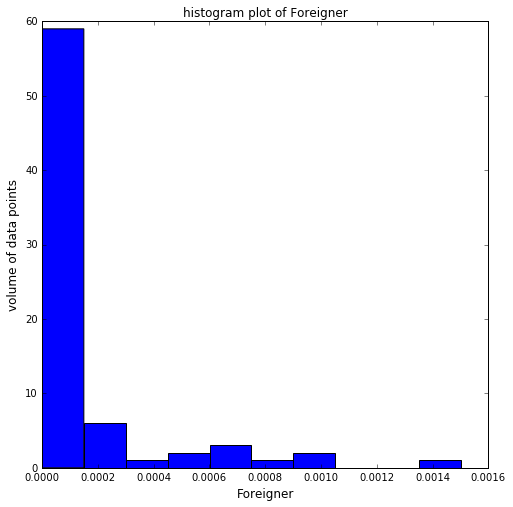

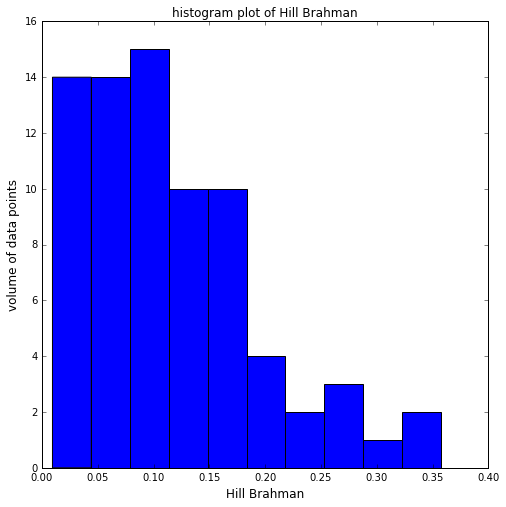

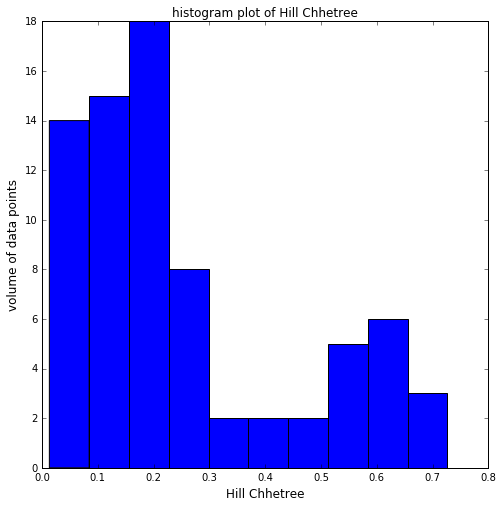

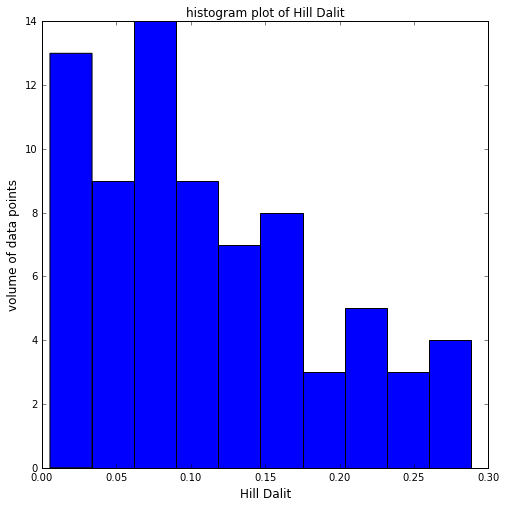

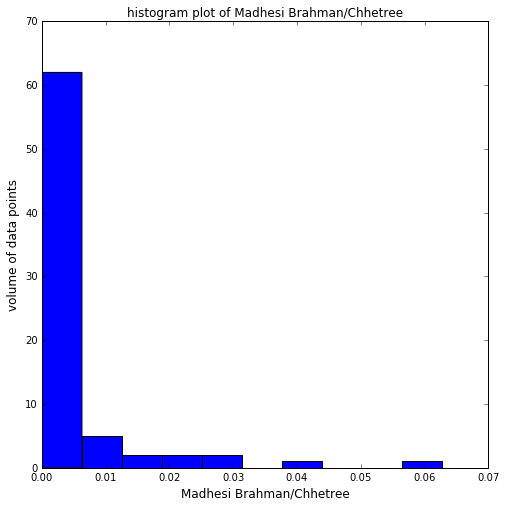

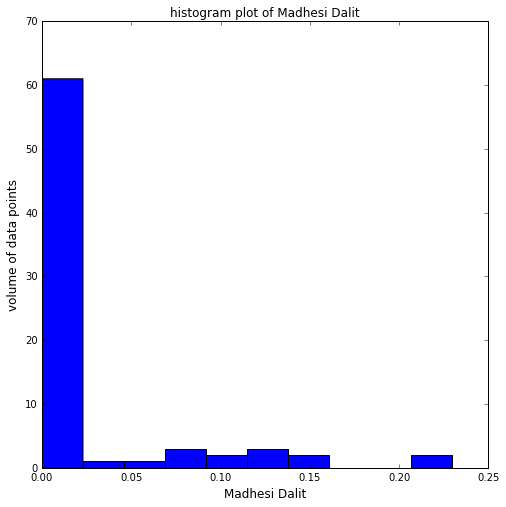

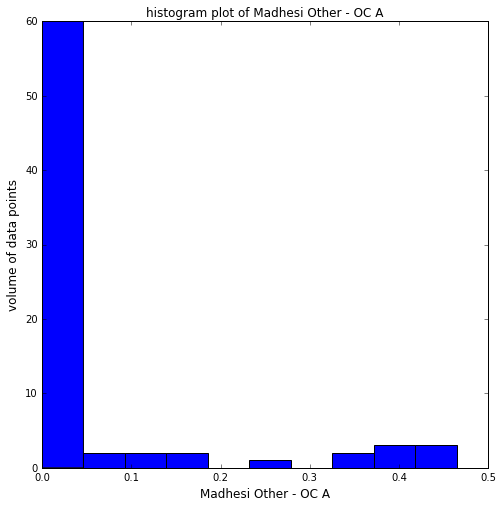

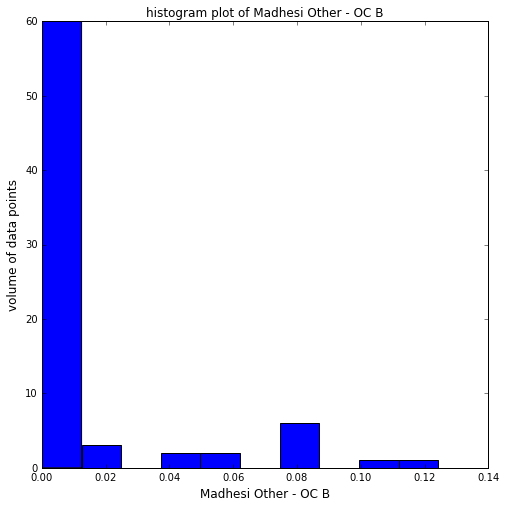

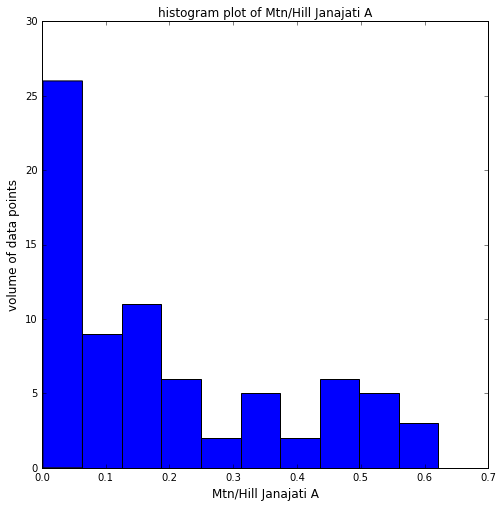

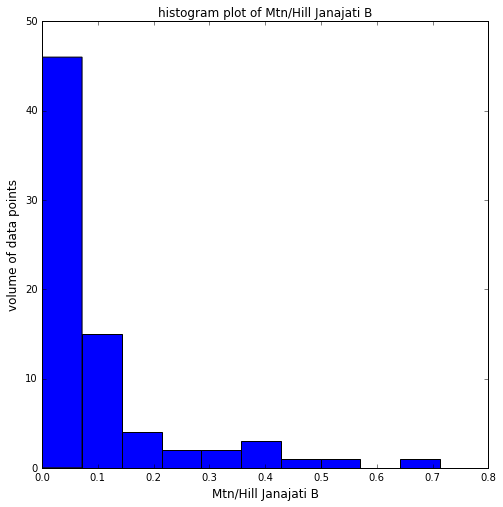

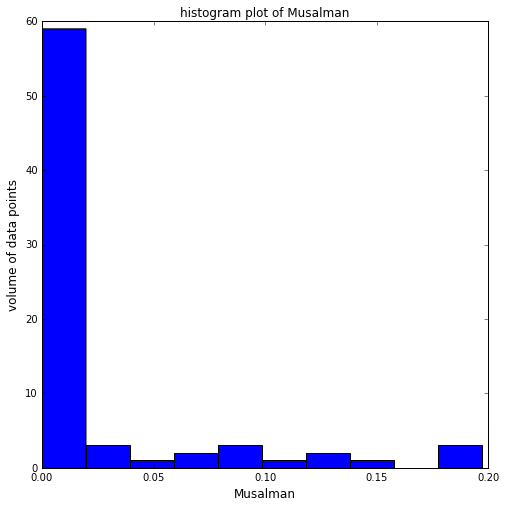

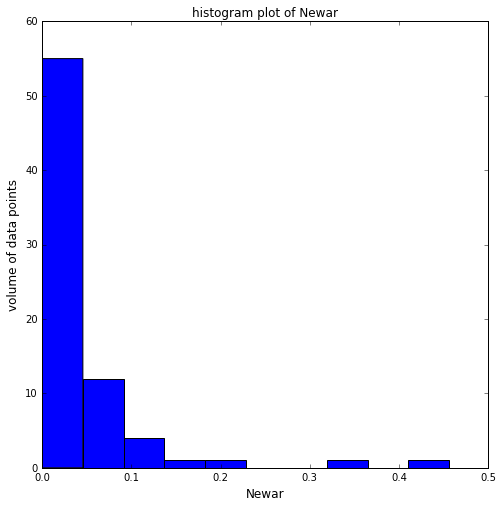

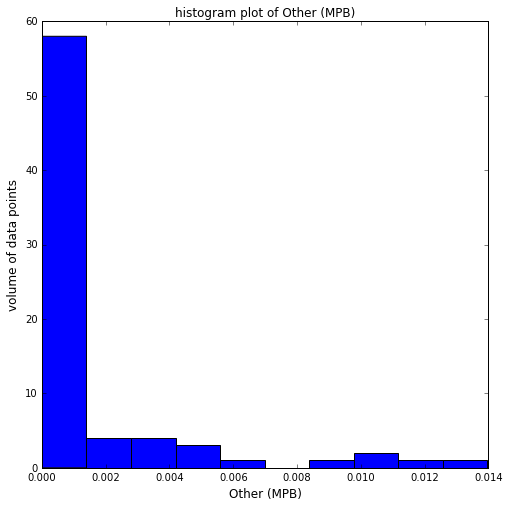

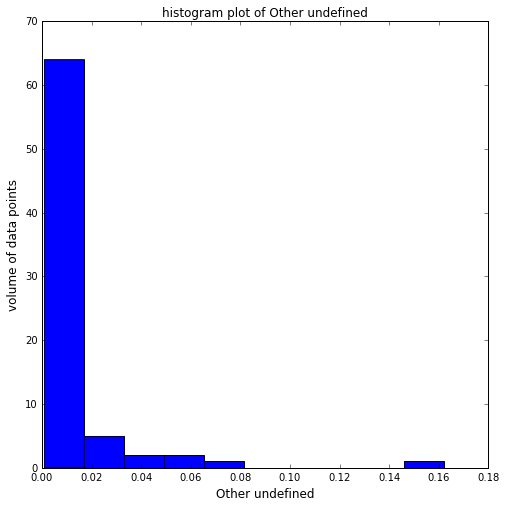

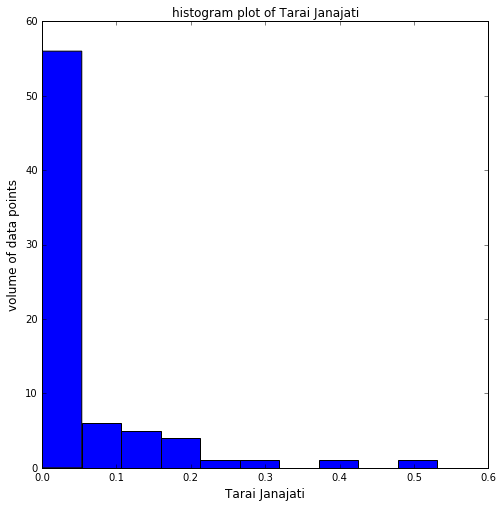

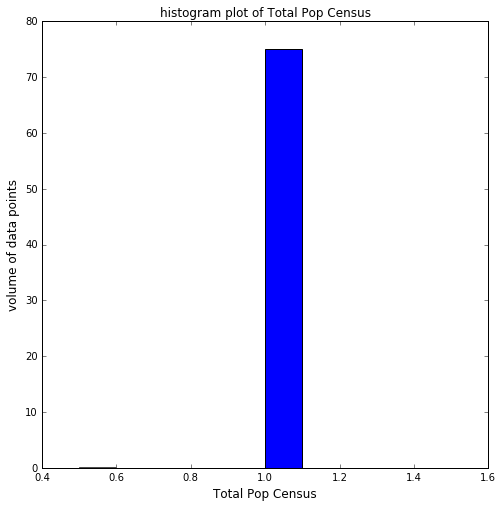

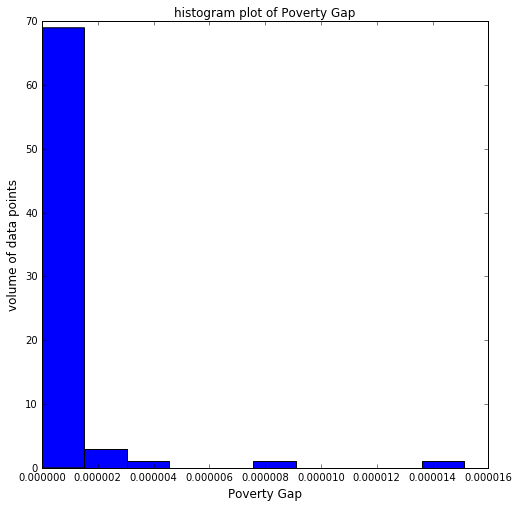

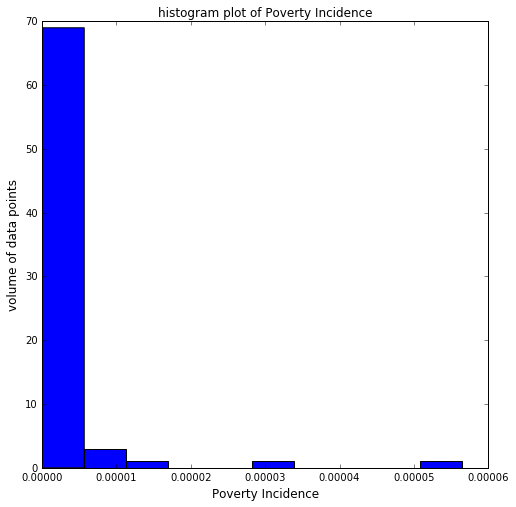

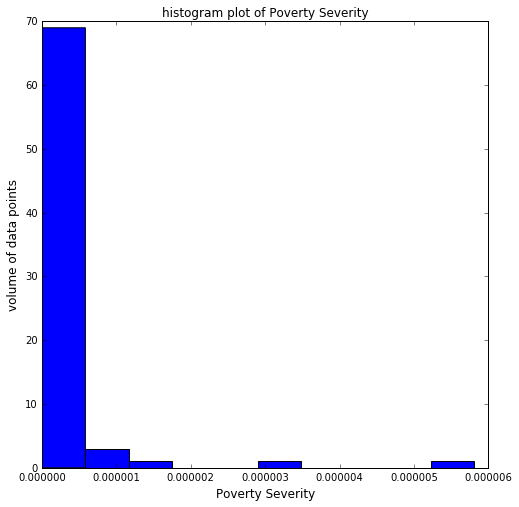

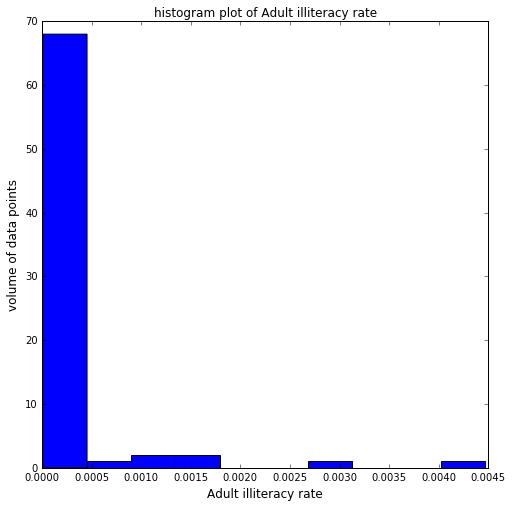

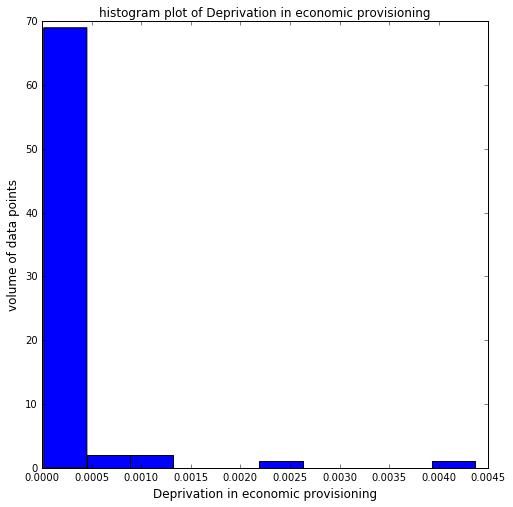

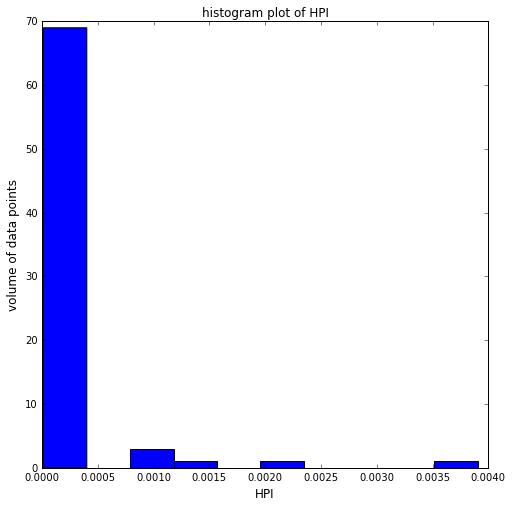

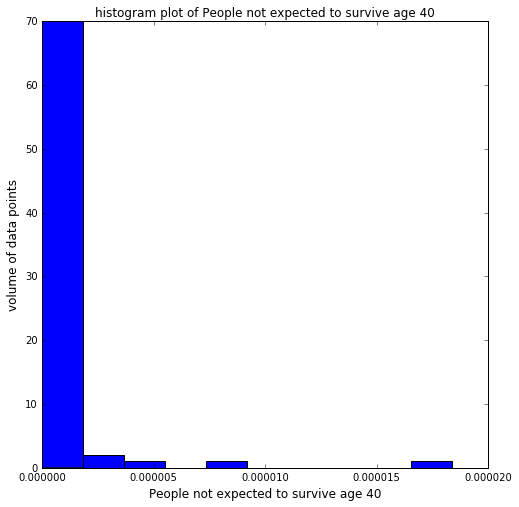

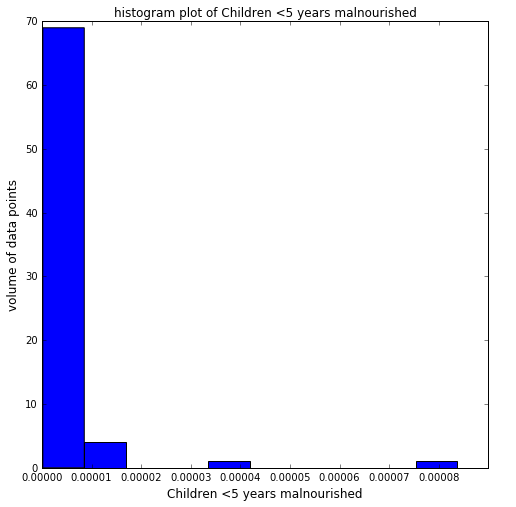

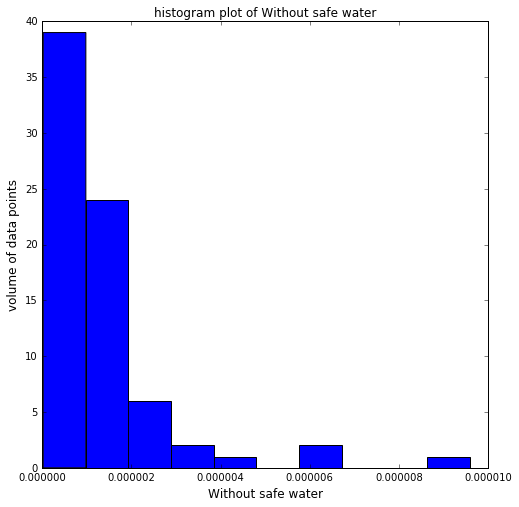

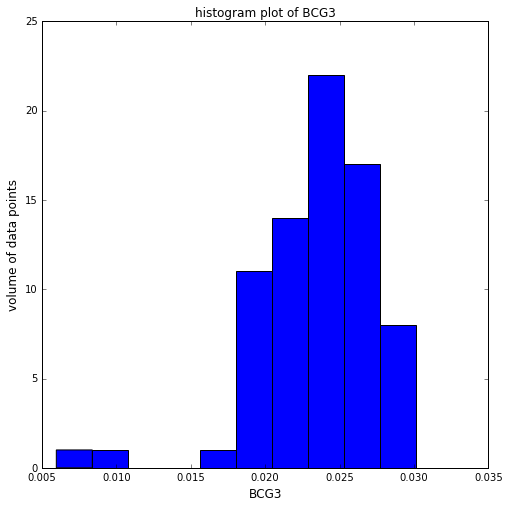

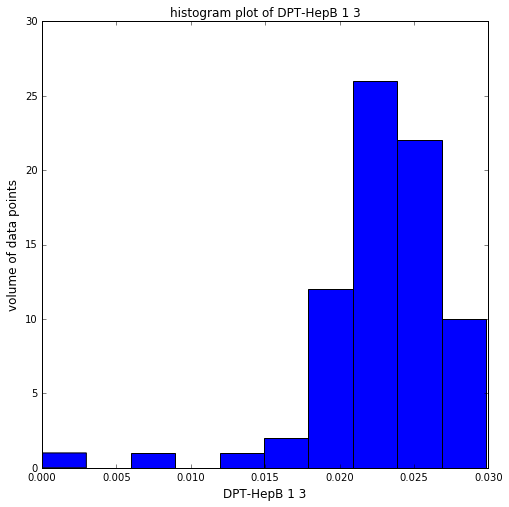

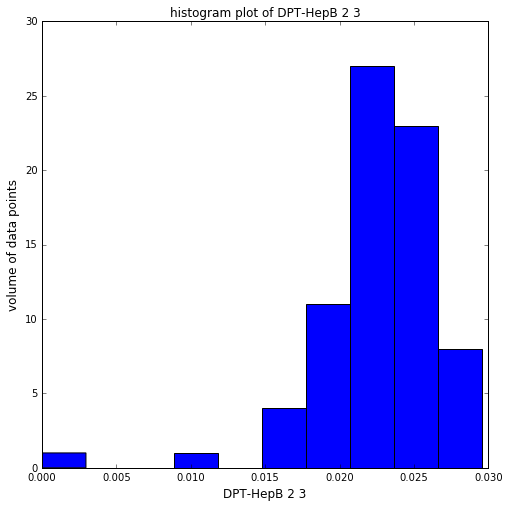

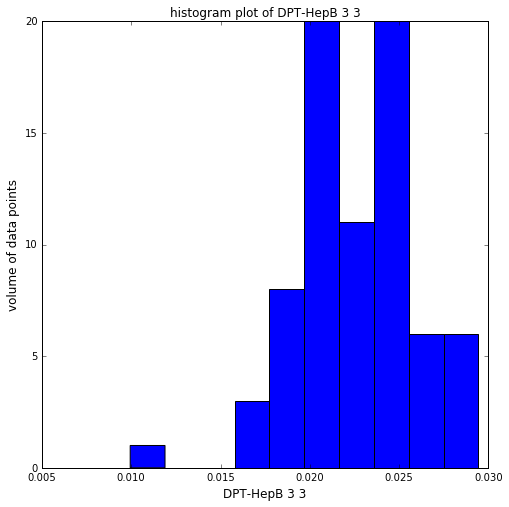

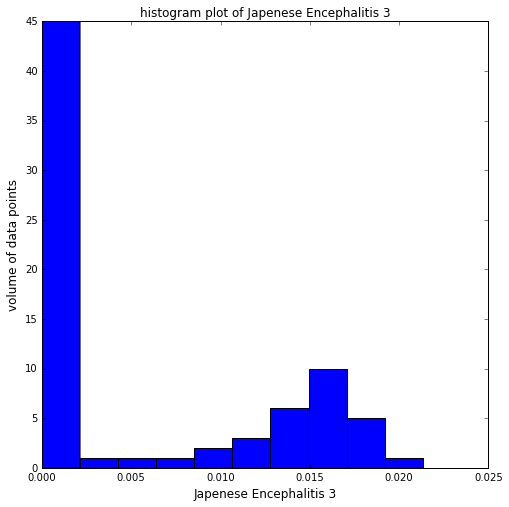

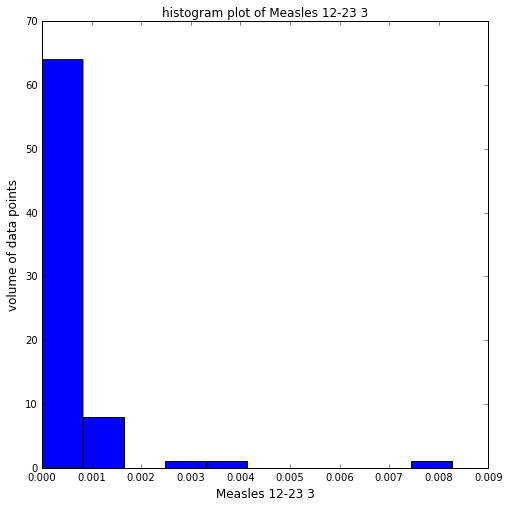

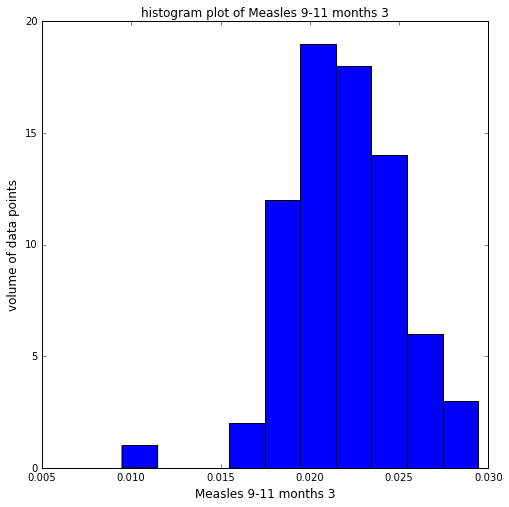

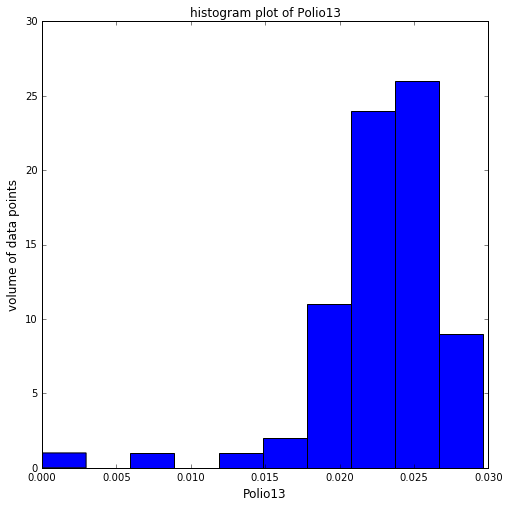

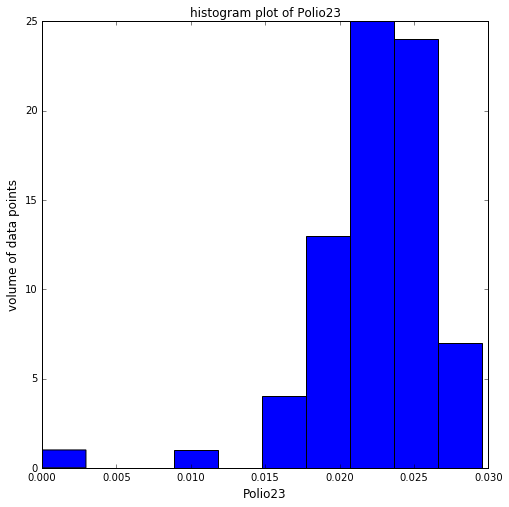

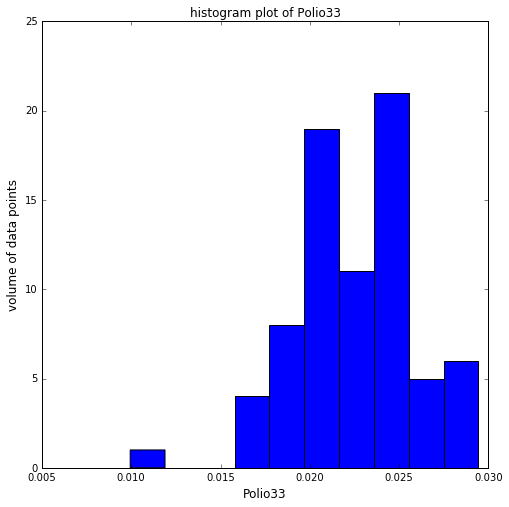

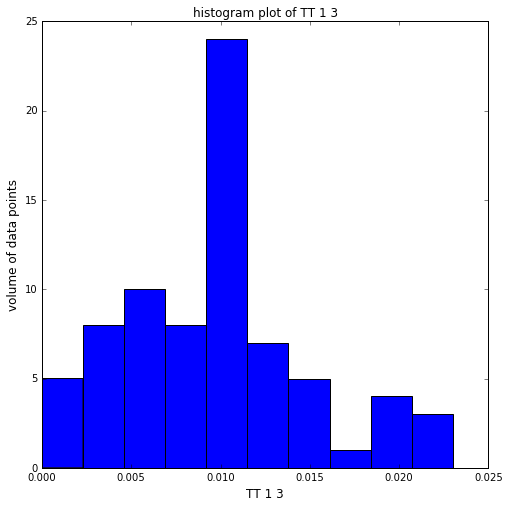

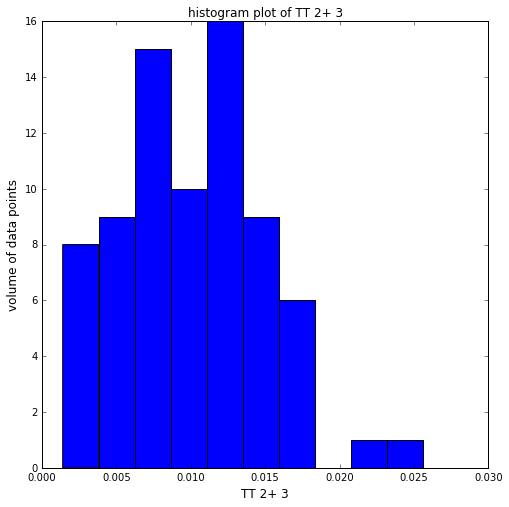

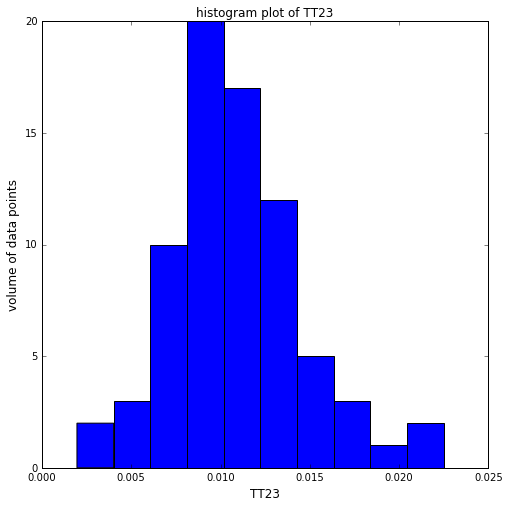

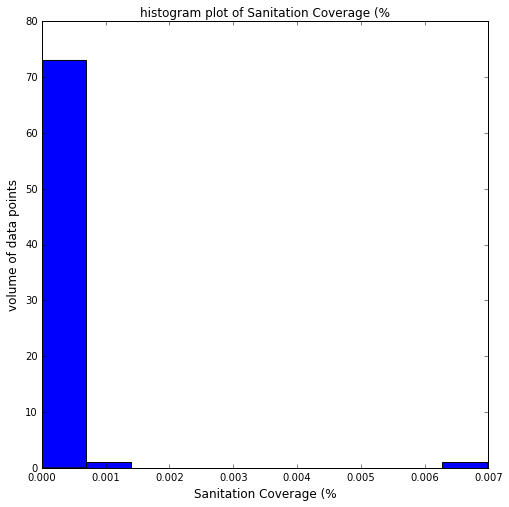

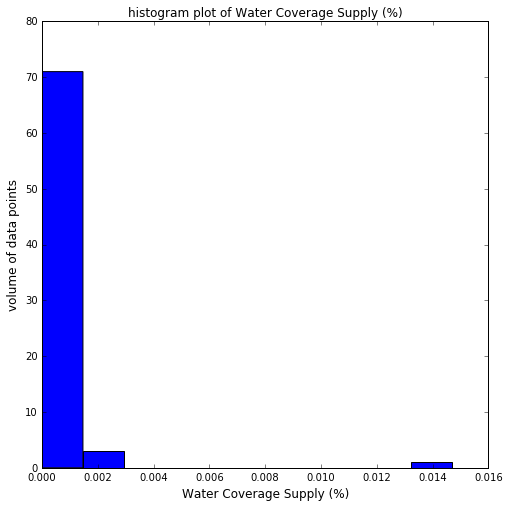

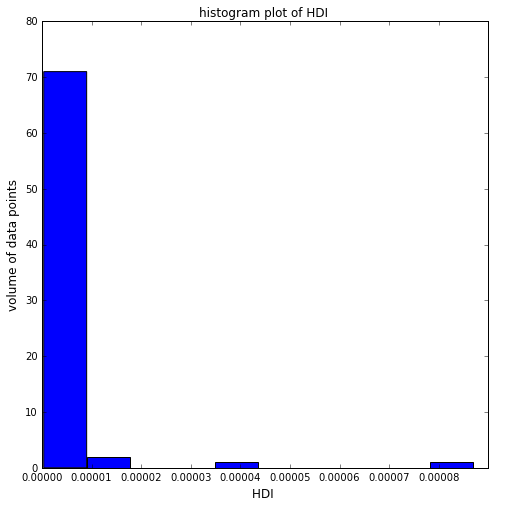

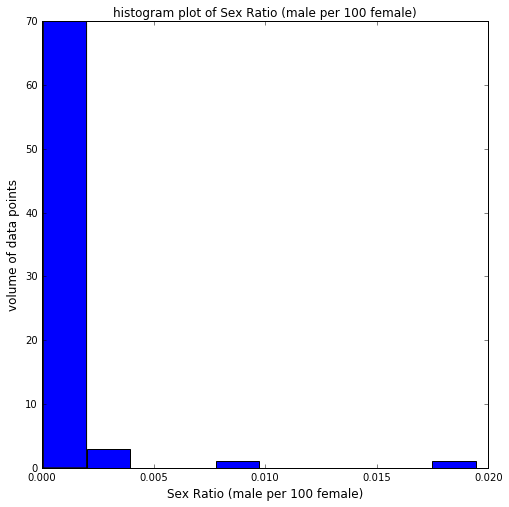

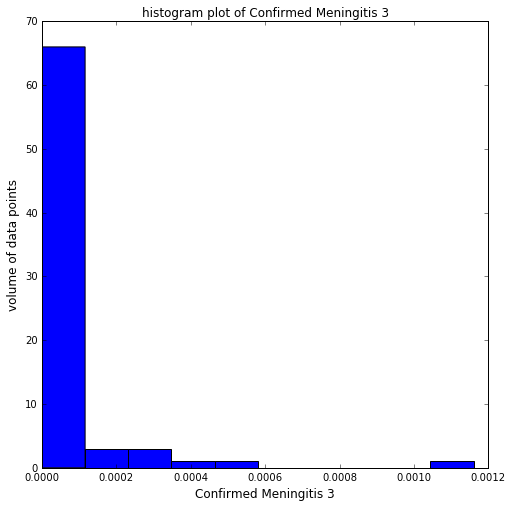

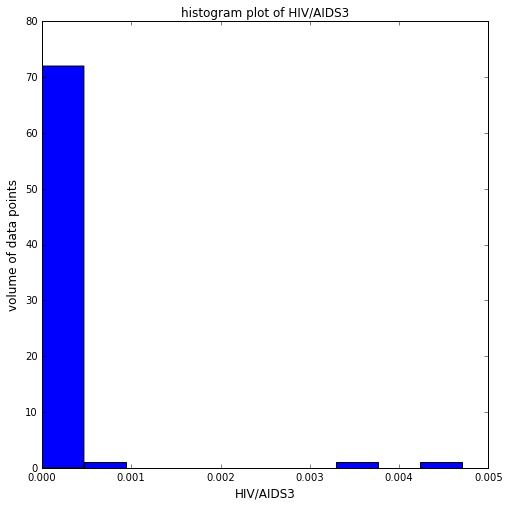

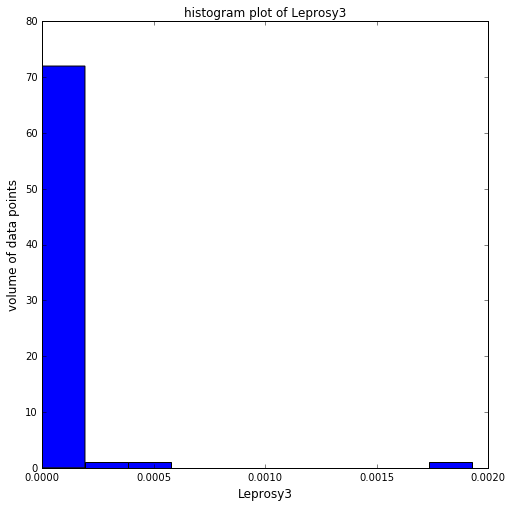

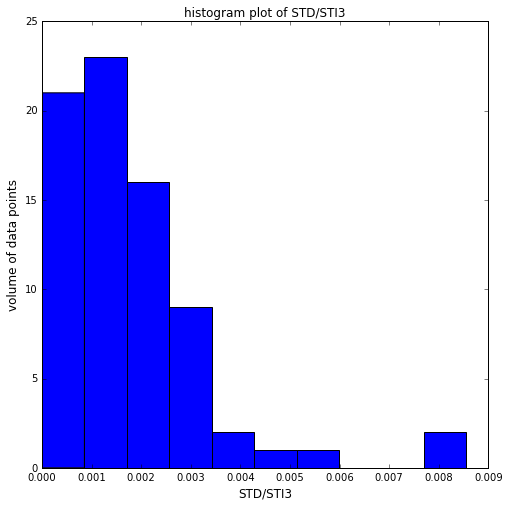

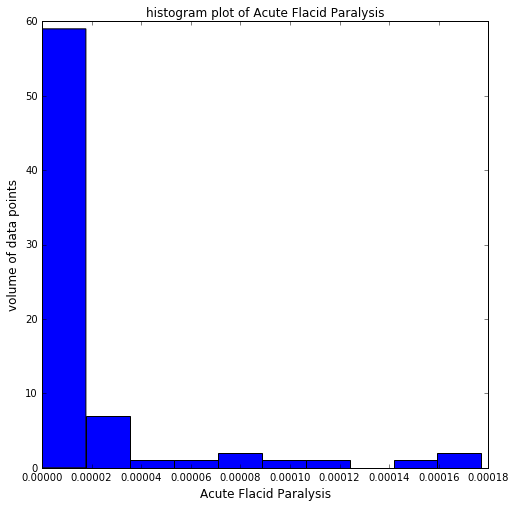

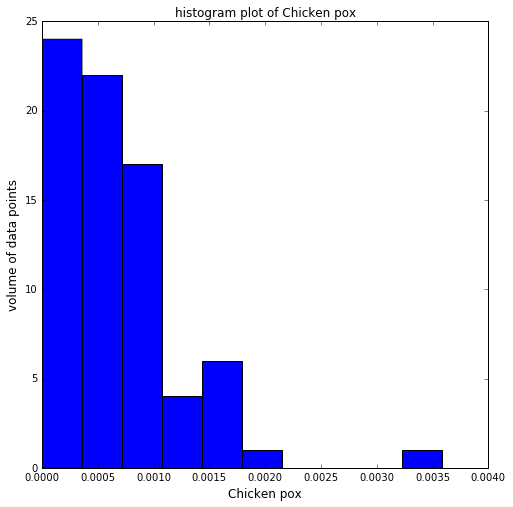

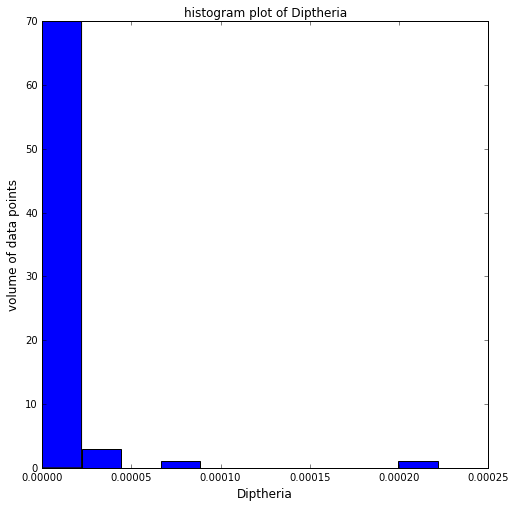

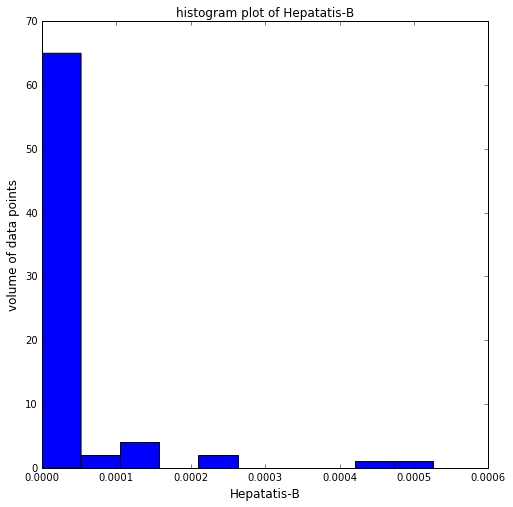

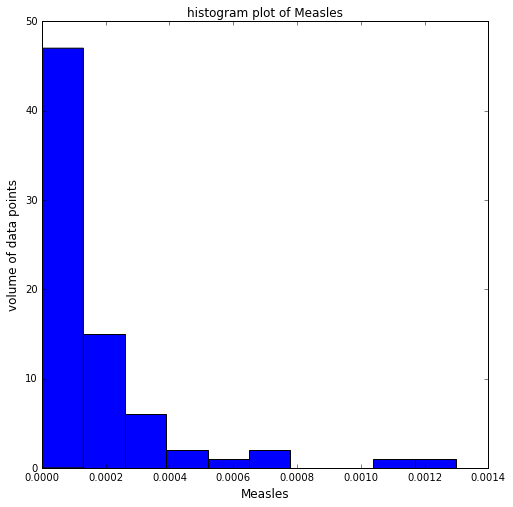

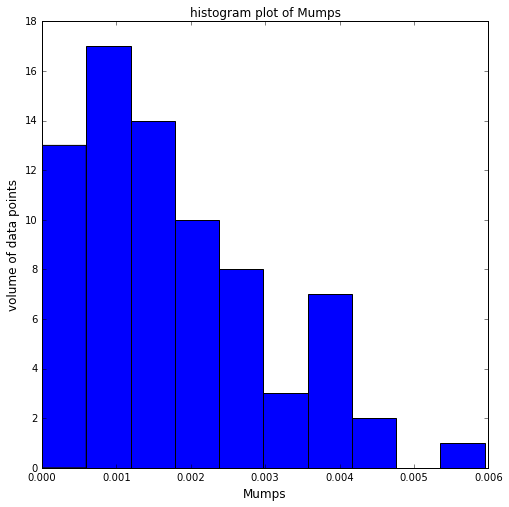

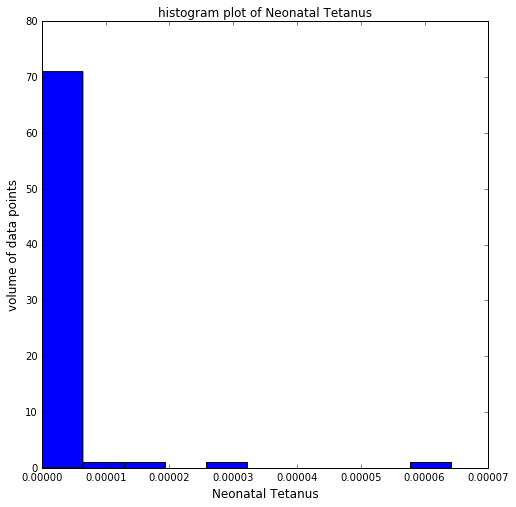

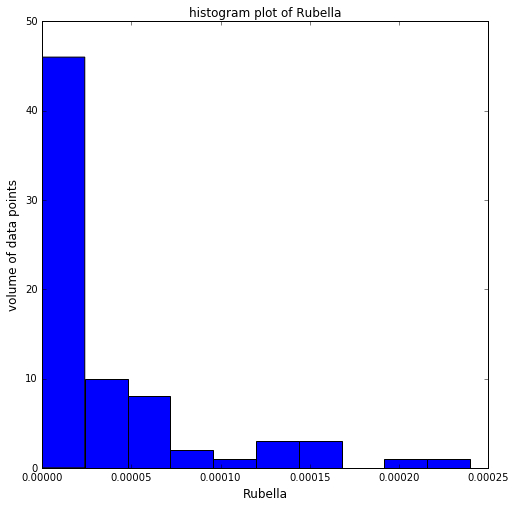

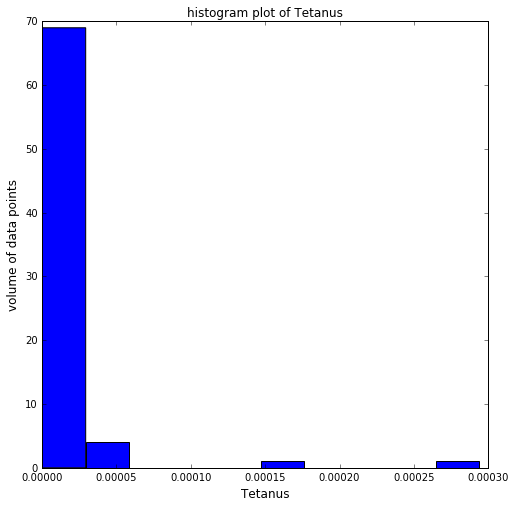

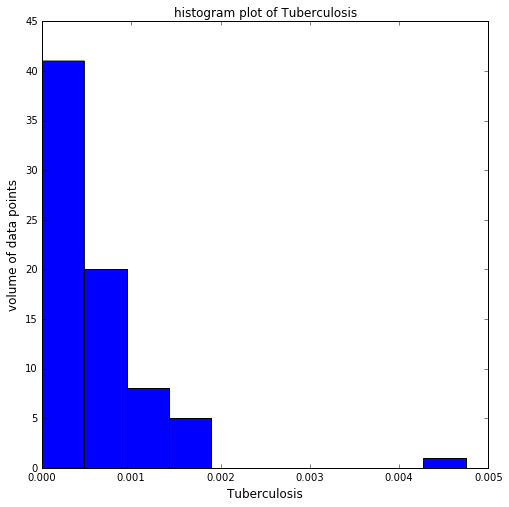

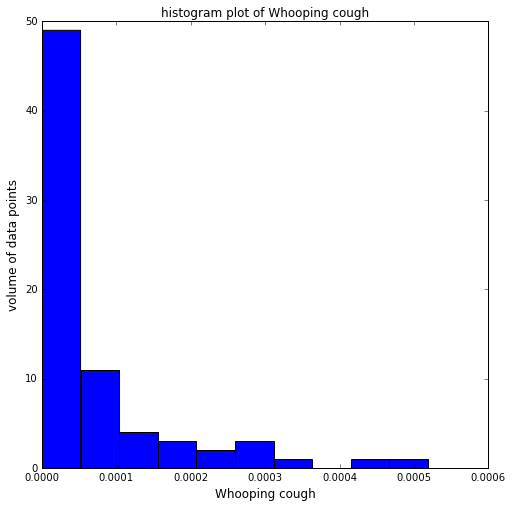

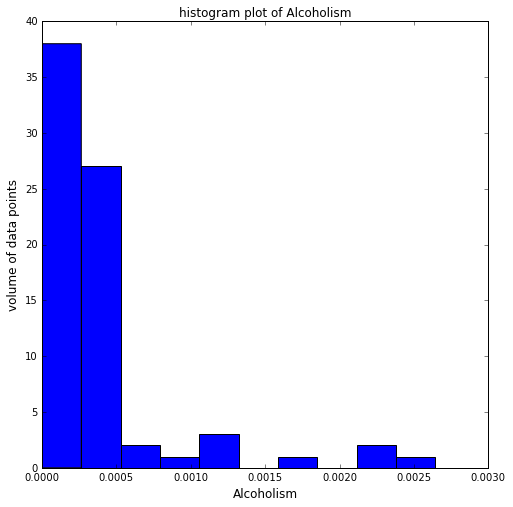

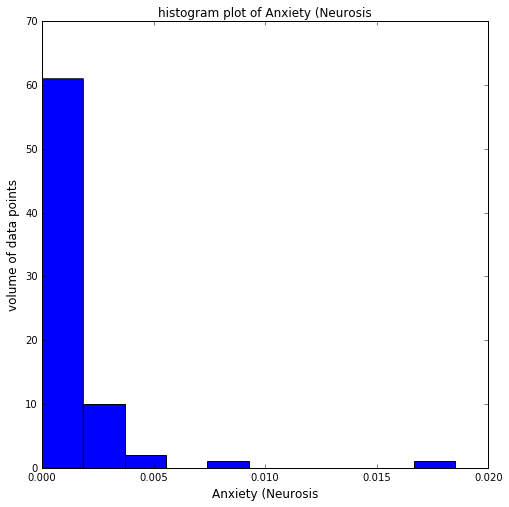

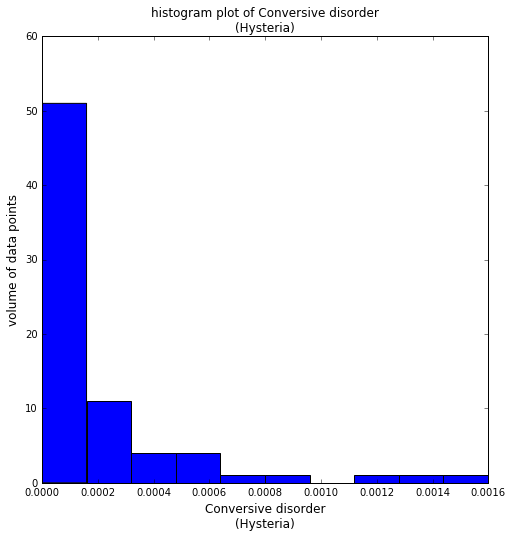

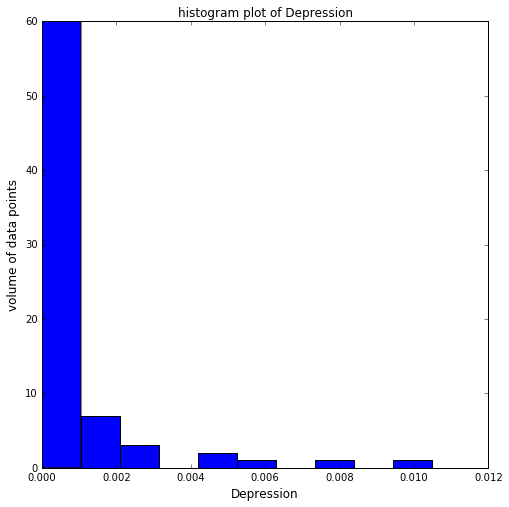

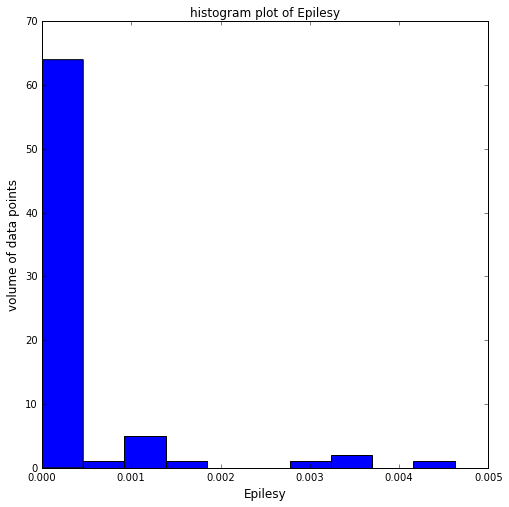

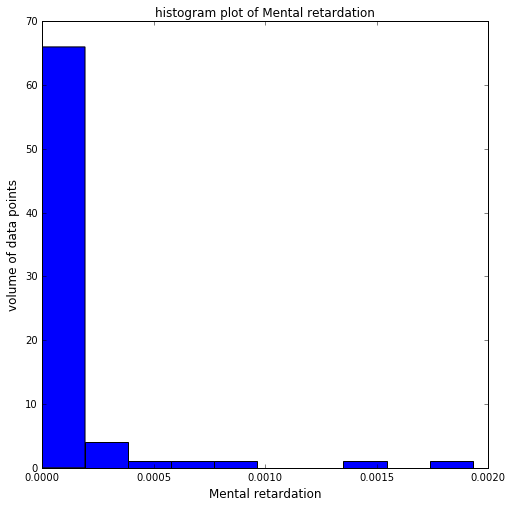

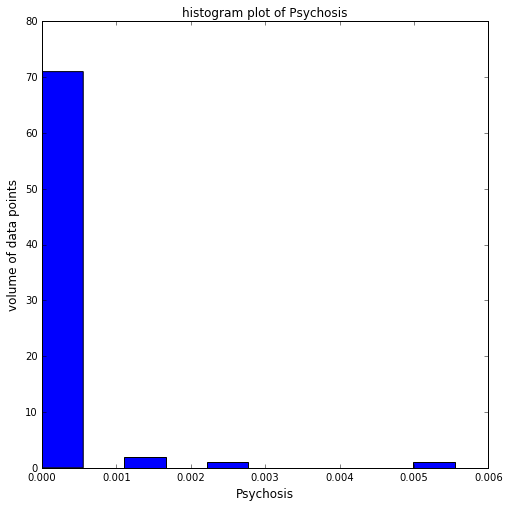

In [20]:
cols = [elem for elem in master.iloc[:,1:].columns]
for elem in cols:
    plt.figure(figsize=(8,8))
    plt.hist(master[elem])
    plt.title('histogram plot of ' + elem, fontsize=12)
    plt.xlabel(elem, fontsize=12)
    plt.ylabel('volume of data points', fontsize=12)

In [21]:
master.to_csv('Data/master_updated.csv')